# Baixando as bibliotecas

In [7]:
!pip install holidays

# Importando as bibliotecas

In [8]:
import pandas as pd
import numpy as np

import holidays
import plotly.express as px
import matplotlib.pyplot as plts
import plotly.graph_objects as go
from datetime import timedelta

import warnings
warnings.filterwarnings("ignore")

## Carregando os dados

In [10]:
m5_data = pd.read_parquet(bucket_uri)

In [11]:
m5_data.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  value        date  
0       CA      0  2011-01-29  
1       CA      0  2011-01-29  
2       CA      0  2011-01-29  
3       CA      0  2011-01-29  
4       CA      0  2011-01-29

## Tipo dos dados

In [12]:
m5_data.dtypes

id          category
item_id     category
dept_id     category
cat_id      category
store_id    category
state_id    category
value          int16
date          object
dtype: object

## Vendas ao longo do tempo em dias

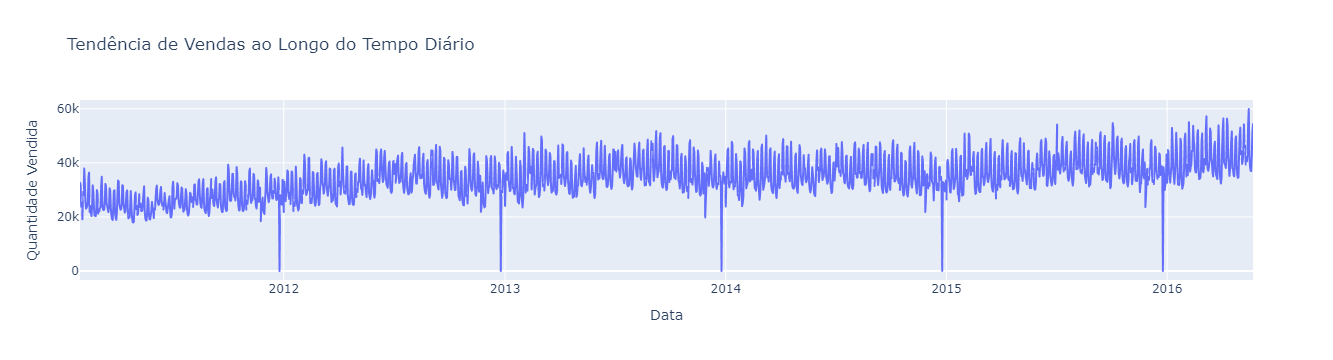

In [13]:
vendas_tempo = m5_data.groupby('date')['value'].sum().reset_index()
fig = px.line(vendas_tempo, x='date', y='value', title='Tendência de Vendas ao Longo do Tempo Diário')
fig.update_layout(xaxis_title='Data', yaxis_title='Quantidade Vendida')
fig.show()

## Vendas ao longo do tempo mensal

In [14]:
m5_clone = m5_data
m5_clone['date'] = pd.to_datetime(m5_clone['date'])
m5_clone.set_index('date', inplace=True)

In [15]:
vendas_tempo_mes = m5_clone['value'].resample("MS").sum().reset_index()

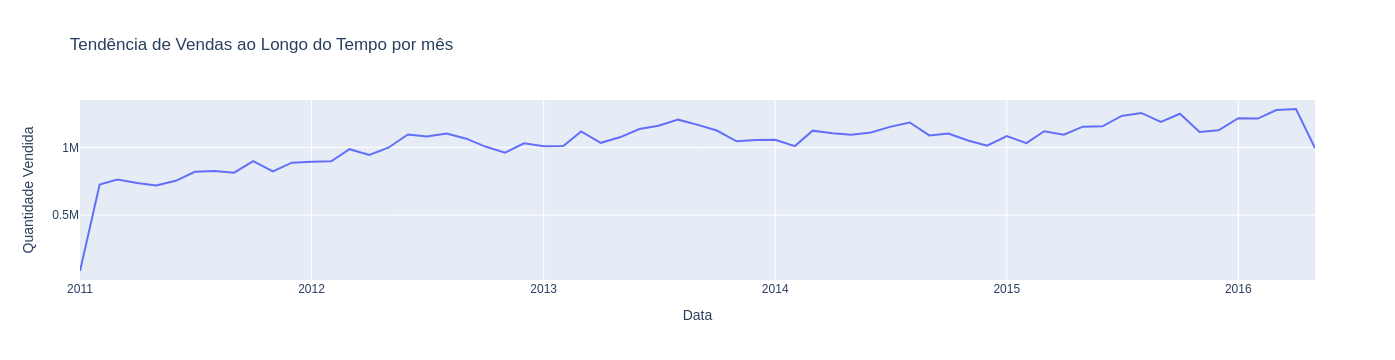

In [16]:
fig = px.line(vendas_tempo_mes, x='date', y='value', title='Tendência de Vendas ao Longo do Tempo por mês')
fig.update_layout(xaxis_title='Data', yaxis_title='Quantidade Vendida')
fig.show()

# Dados agrupados por categoria e estado

In [17]:
vendas_estado_categoria = m5_data.groupby(['state_id', 'date', 'cat_id'])['value'].sum().reset_index()

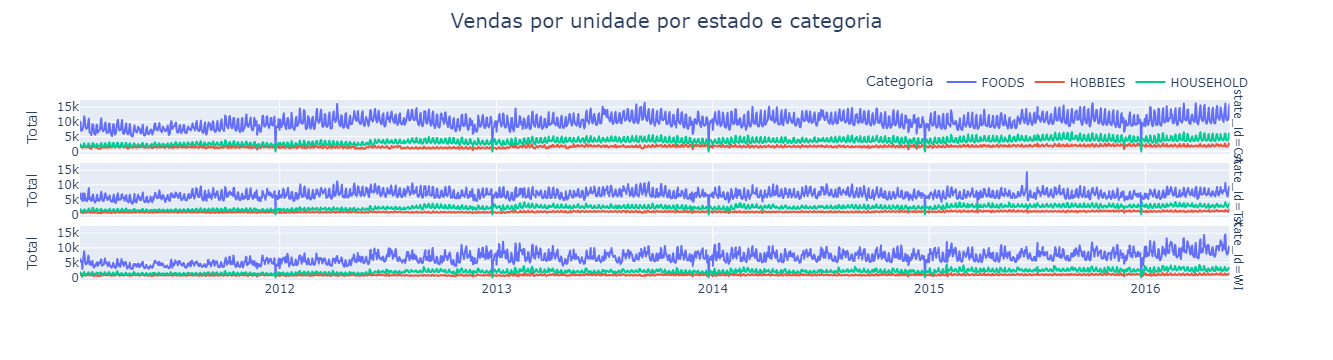

In [18]:
fig = px.line(vendas_estado_categoria, x='date', y='value', color='cat_id', facet_row='state_id',
              facet_row_spacing=0.05, facet_col_spacing=0.1,
              labels={'date': 'Time', 'value': 'Total', 'cat_id': 'Categoria'},
              title='Vendas por unidade por estado e categoria')

fig.update_xaxes(title=None)
fig.update_yaxes(title_text='Total')

fig.update_layout(title_x=0.5, title_font_size=20, title_y=0.96,
                  legend_title='Categoria', legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1), height=1000)

fig.show()

## Produtos agrupados por categoria

In [19]:
cat = m5_data.groupby("cat_id")["item_id"].agg('count').reset_index()

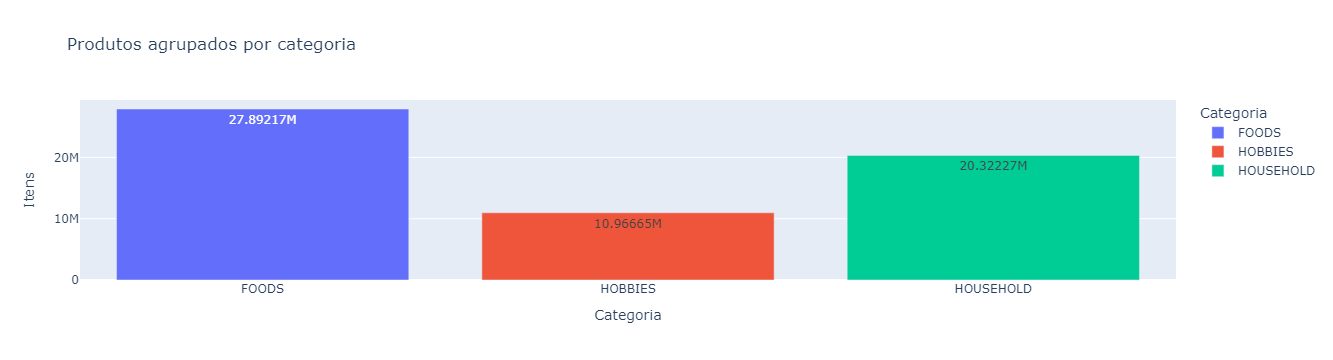

In [20]:
fig = px.bar(cat, y="item_id", x="cat_id", color="cat_id",
             title="Produtos agrupados por categoria",
             labels={"cat_id" : "Categoria",
                    "item_id" : "Itens"},text_auto=True)
fig.show()

## Produtos agrupados por departamento

In [21]:
dep = m5_data.groupby("dept_id")["item_id"].agg('count').reset_index()

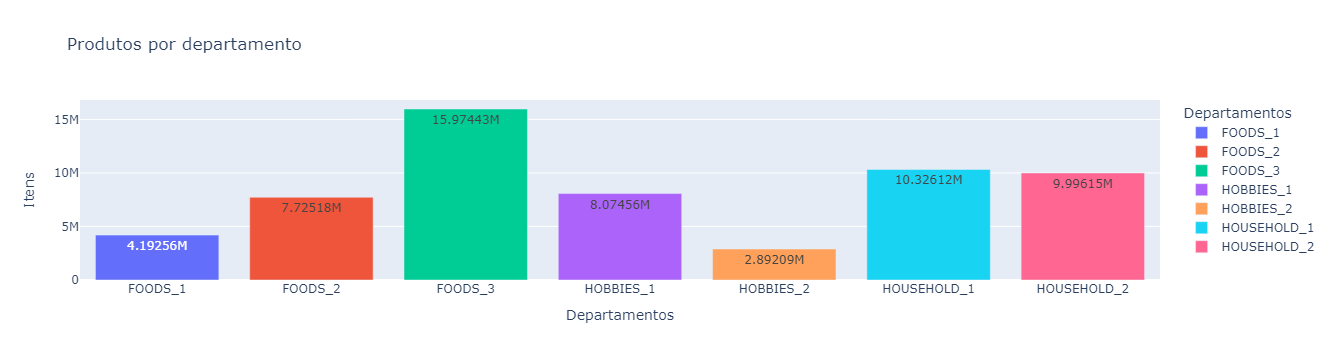

In [22]:
departamentos = px.bar(dep, y="item_id", x="dept_id", color="dept_id",
                       title="Produtos por departamento",
                        labels={"dept_id" : "Departamentos",
                                 "item_id" : "Itens"}, text_auto=True)
departamentos.show()

## Vendas totais por estado

In [23]:
vendas_estado_categoria = m5_data.groupby(['state_id', 'cat_id'])['value'].sum().unstack().fillna(0)

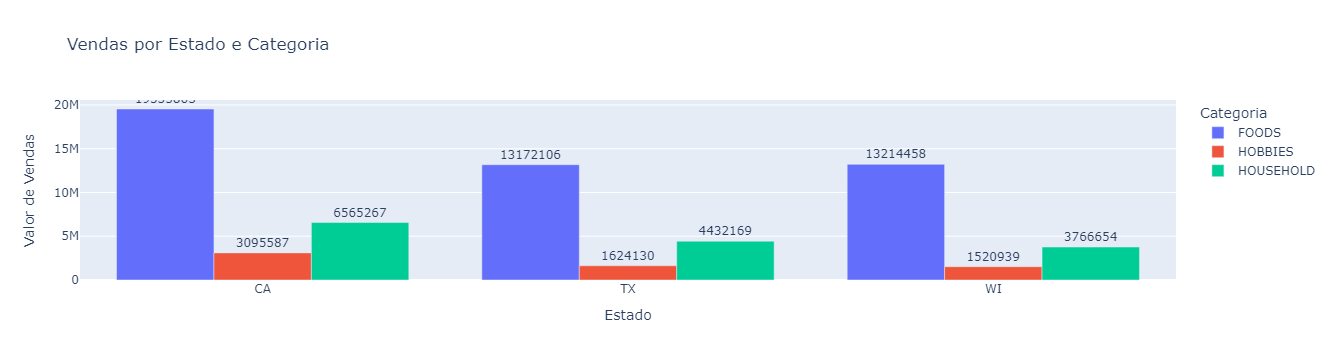

In [24]:
data = []
for col in vendas_estado_categoria.columns:
    data.append(go.Bar(
        x=vendas_estado_categoria.index,
        y=vendas_estado_categoria[col],
        name=col,
        text=vendas_estado_categoria[col],
        textposition='outside'
    ))
layout = go.Layout(
    title='Vendas por Estado e Categoria',
    xaxis=dict(title='Estado'),
    yaxis=dict(title='Valor de Vendas'),
    legend=dict(title='Categoria')
)
fig = go.Figure(data=data, layout=layout)
fig.show()

## Departamentos agrupados por estado

In [25]:
vendas_estado_departamento = m5_data.groupby(['state_id', 'dept_id'])['value'].sum().unstack().fillna(0)

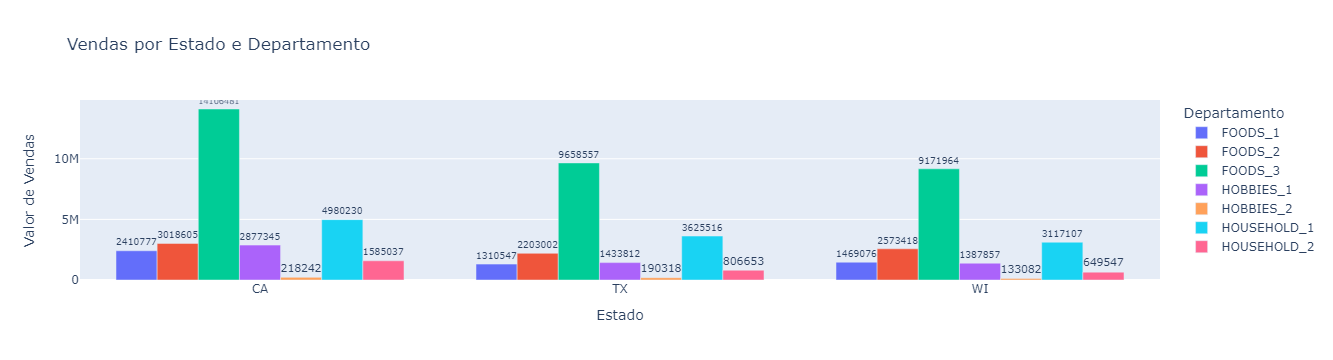

In [26]:
data = []

for col in vendas_estado_departamento.columns:
    data.append(go.Bar(
        x=vendas_estado_departamento.index,
        y=vendas_estado_departamento[col],
        name=col,
        text=vendas_estado_departamento[col],
        textposition='outside'
    ))
layout = go.Layout(
    title='Vendas por Estado e Departamento',
    xaxis=dict(title='Estado'),
    yaxis=dict(title='Valor de Vendas'),
    legend=dict(title='Departamento')
)
fig = go.Figure(data=data, layout=layout)
fig.show()

## Tendencia meses

In [27]:
m5_data = m5_data.reset_index()

In [28]:
m5_data['date'] = pd.to_datetime(m5_data['date'])

In [29]:
mes_venda = m5_data.groupby([m5_data['date'].dt.to_period('M'), 'state_id'])['value'].sum().reset_index()
mes_venda['date'] = mes_venda['date'].dt.to_timestamp()

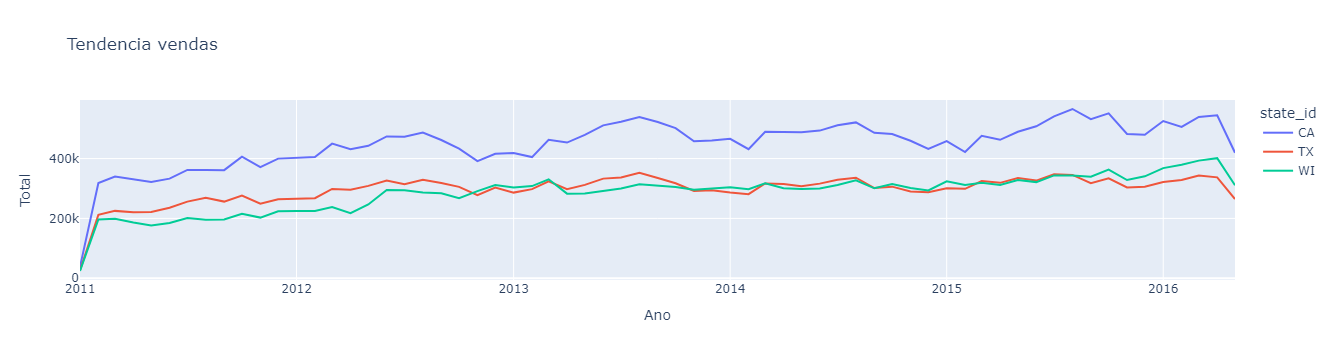

In [30]:
fig = px.line(mes_venda, x='date', y='value', color='state_id', title='Tendencia vendas')
fig.update_layout(xaxis_title='Ano', yaxis_title='Total')
fig.show()

## Produto mais vendido por loja

In [31]:
produto_mais_vendido_loja = m5_data.groupby(['store_id', 'item_id'])['value'].sum().reset_index()

In [32]:
produto_mais_vendido_loja = produto_mais_vendido_loja.sort_values(['store_id', 'value'], ascending=[True, False])
produto_mais_vendido_loja = produto_mais_vendido_loja.loc[produto_mais_vendido_loja.groupby('store_id')['value'].idxmax()].reset_index(drop=True)
produto_mais_vendido_loja['item_id'] = produto_mais_vendido_loja['item_id'].astype('object')

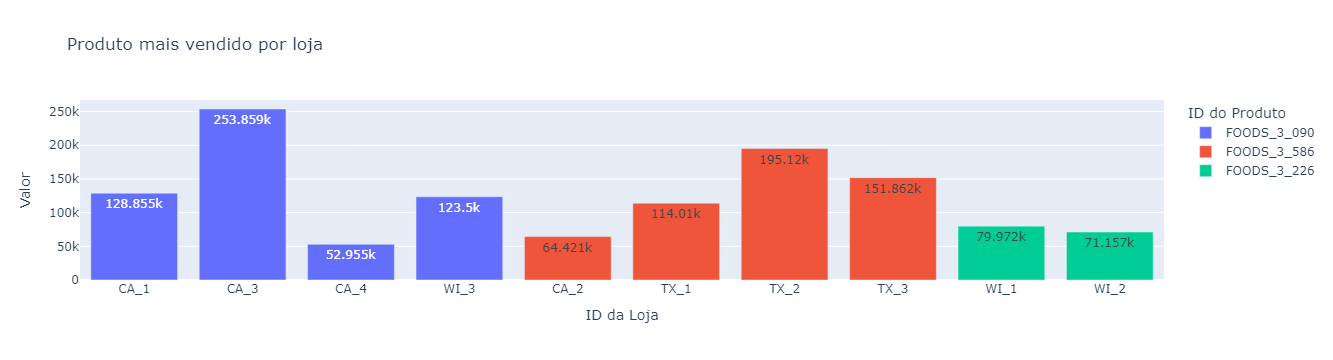

In [33]:
fig = px.bar(produto_mais_vendido_loja, x='store_id', y='value', color='item_id',
             title='Produto mais vendido por loja',
             labels={'store_id': 'ID da Loja', 'value': 'Valor', 'item_id': 'ID do Produto'},text_auto=True)
fig.show()

## Produto Mais Vendido por Estado

In [34]:
produto_mais_vendido_estado = m5_data.groupby(['state_id', 'item_id'])['value'].sum().reset_index()

In [35]:
produto_mais_vendido_estado = produto_mais_vendido_estado.sort_values(['state_id', 'value'], ascending=[True, False])
produto_mais_vendido_estado = produto_mais_vendido_estado.groupby('state_id').first().reset_index()
produto_mais_vendido_estado = produto_mais_vendido_estado.loc[produto_mais_vendido_estado.groupby('state_id')['value'].idxmax()].reset_index(drop=True)
produto_mais_vendido_estado['item_id'] = produto_mais_vendido_estado['item_id'].astype('object')

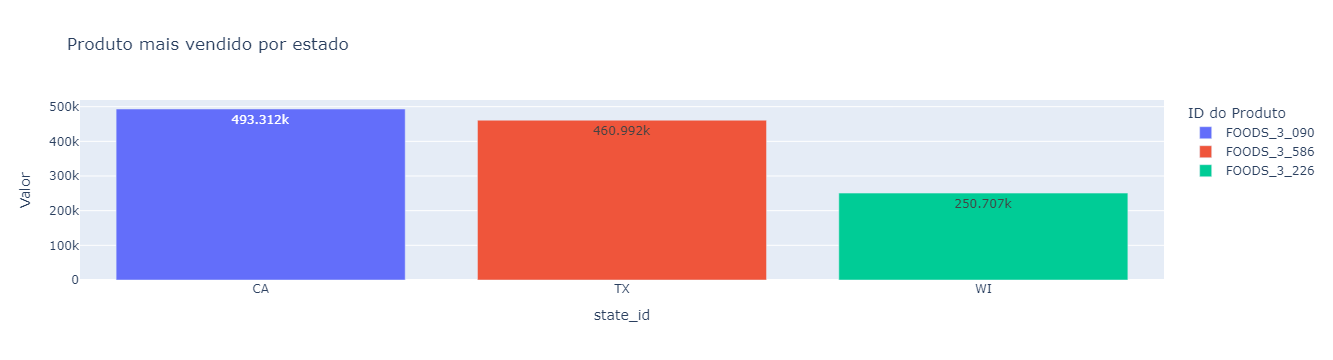

In [36]:
fig = px.bar(produto_mais_vendido_estado, x='state_id', y='value', color='item_id',
             title='Produto mais vendido por estado',
             labels={'store_id': 'ID da Loja', 'value': 'Valor', 'item_id': 'ID do Produto'},text_auto=True)
fig.show()

## Desempenho por Departamento

In [37]:
desempenho_departamento = m5_data.groupby('dept_id')['value'].sum().reset_index()
desempenho_departamento = desempenho_departamento.sort_values('value', ascending=False)

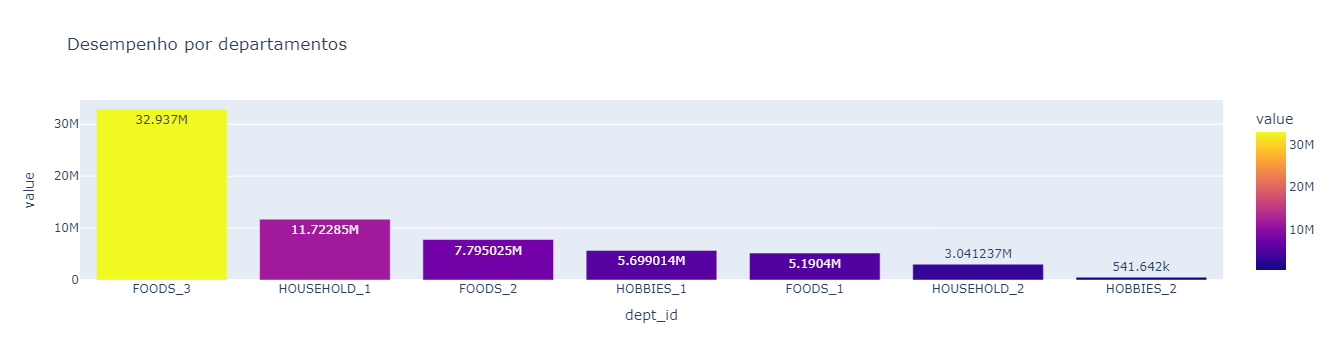

In [38]:
fig = px.bar(desempenho_departamento, x='dept_id', y='value', color='value',
             title='Desempenho por departamentos',text_auto=True)
fig.show()

## Desempenho por Categoria

In [39]:
desempenho_categoria = m5_data.groupby('cat_id')['value'].sum().reset_index()
desempenho_categoria = desempenho_categoria.sort_values('value', ascending=False)

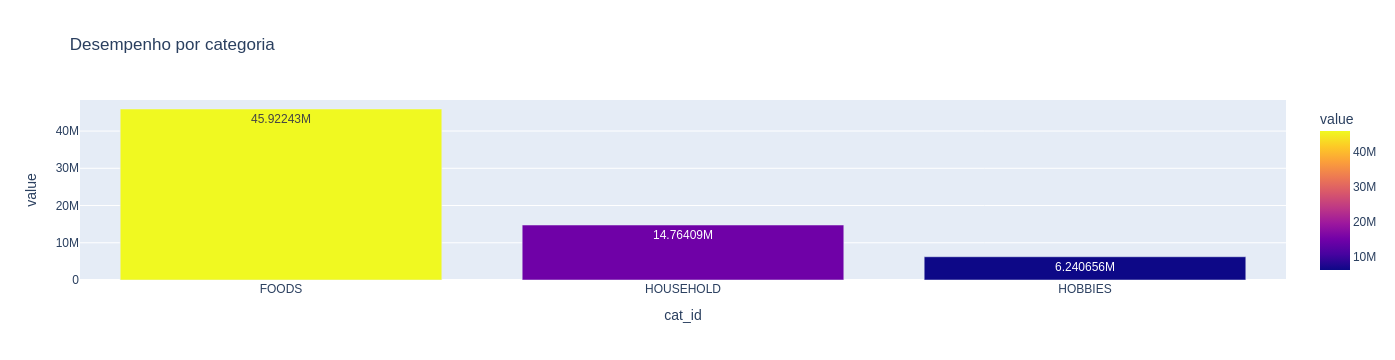

In [40]:
fig = px.bar(desempenho_categoria, x='cat_id', y='value', color='value',
             title='Desempenho por categoria',text_auto=True)
fig.show()

## Vendas por Estado

In [41]:
vendas_estado = m5_data.groupby('state_id')['value'].sum().reset_index()
vendas_estado = vendas_estado.sort_values('value', ascending=False)

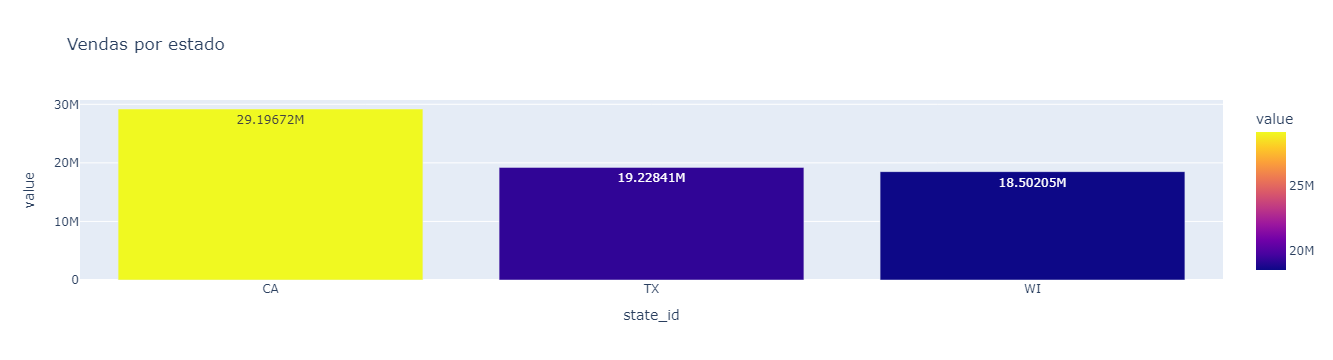

In [42]:
fig = px.bar(vendas_estado, x='state_id', y='value', color='value',
             title='Vendas por estado',text_auto=True)
fig.show()

## Vendas por Loja

In [43]:
vendas_loja = m5_data.groupby('store_id')['value'].sum().reset_index()
vendas_loja = vendas_loja.sort_values('value', ascending=False)

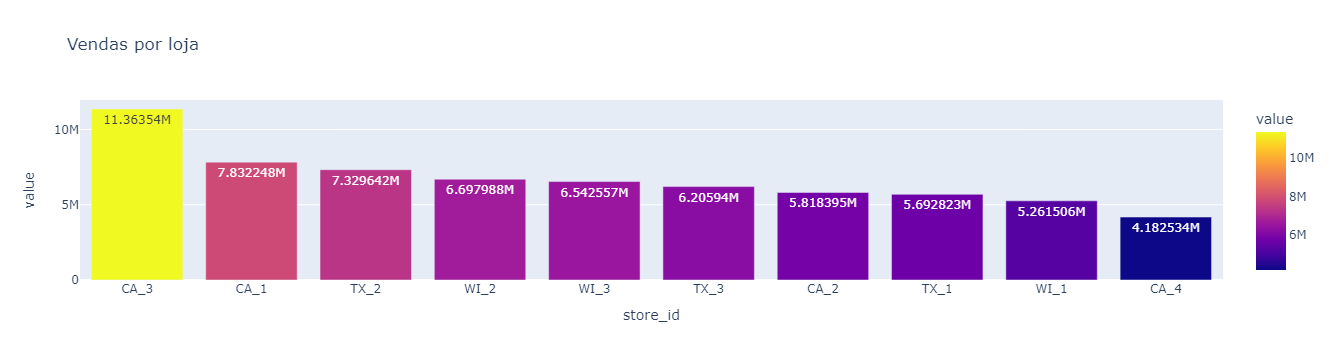

In [44]:
fig = px.bar(vendas_loja, x='store_id', y='value', color='value',
             title='Vendas por loja',text_auto=True)
fig.show()

## Vendas por feriados

In [45]:
us_holidays = holidays.US()

df_holidays = m5_data[m5_data["date"].apply(lambda d: d in us_holidays)]

df_holidays['date'] = pd.to_datetime(df_holidays['date'])

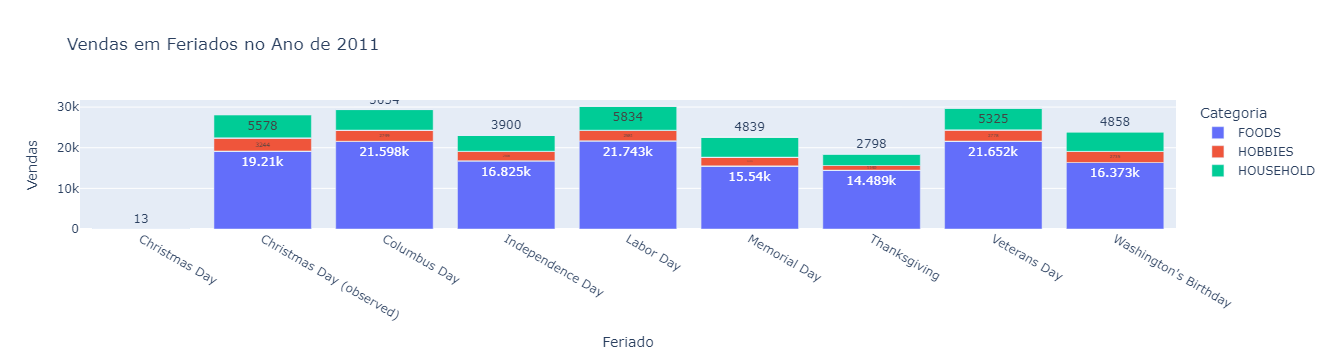

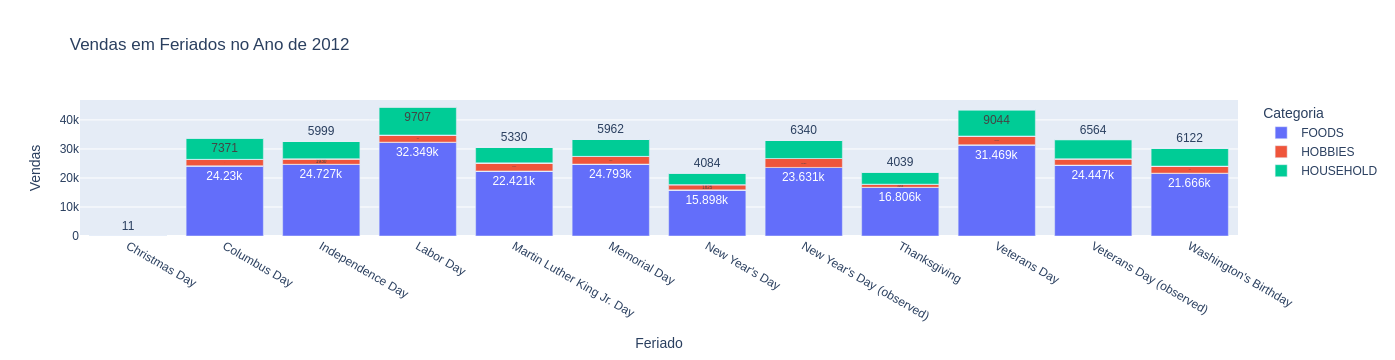

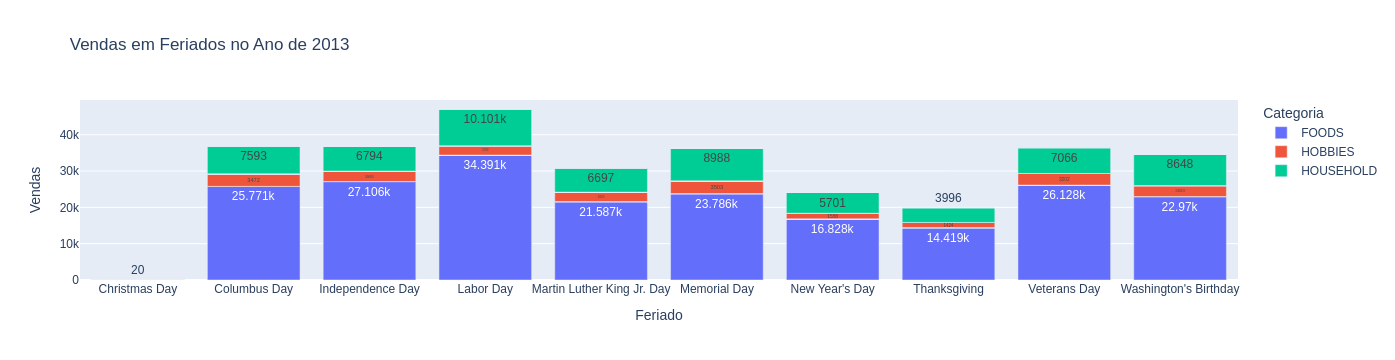

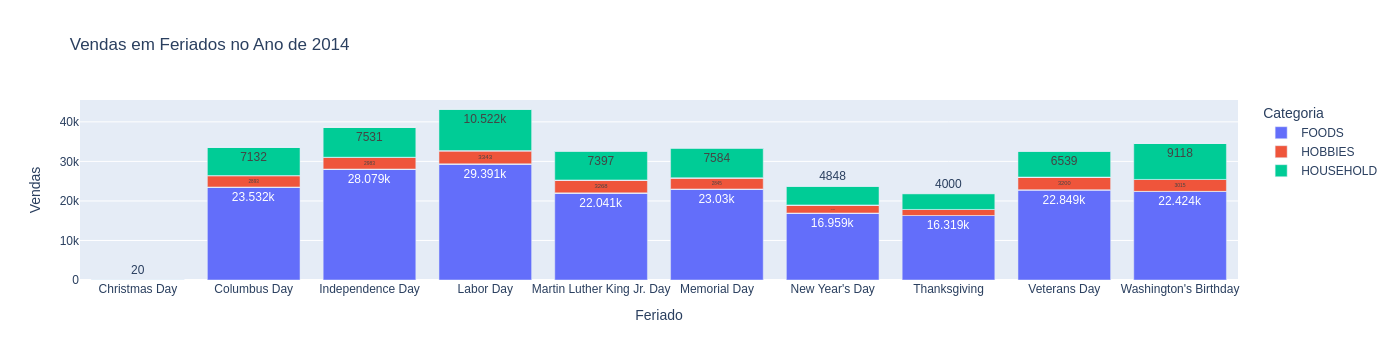

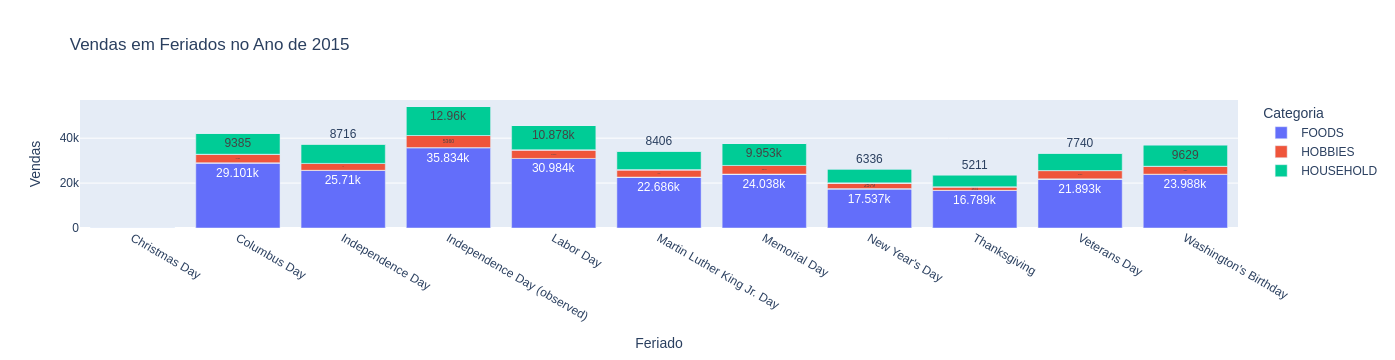

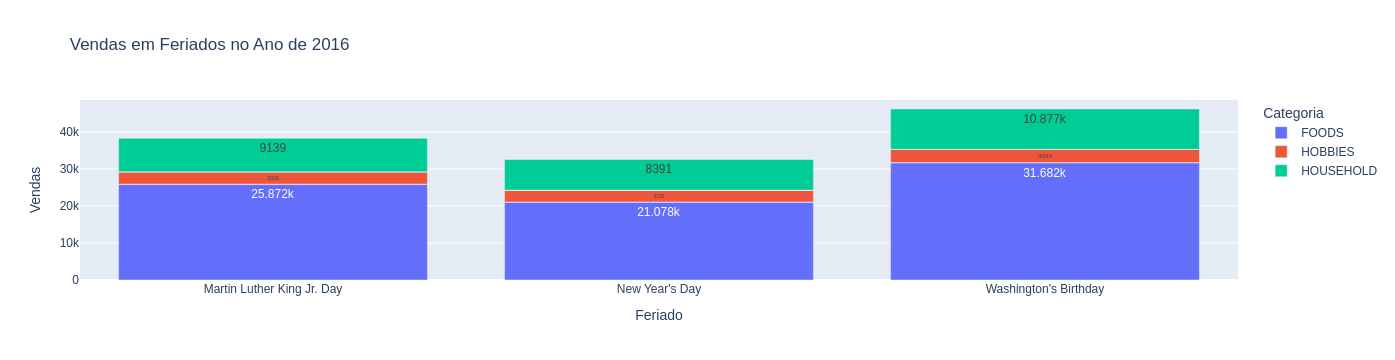

In [46]:
for year in range(2011, 2017):
    df_year = df_holidays[df_holidays['date'].dt.year == year]
    df_year['holiday_name'] = df_year['date'].apply(lambda d: us_holidays.get(d))

    vendas_anuais = df_year.groupby(['date', 'holiday_name', 'cat_id'])['value'].sum().reset_index()

    fig = px.bar(vendas_anuais, x='holiday_name', y='value', color='cat_id',
                 labels={'holiday_name': 'Feriado', 'value': 'Vendas', 'cat_id': 'Categoria'},
                 title=f'Vendas em Feriados no Ano de {year}',text_auto=True)

    fig.update_xaxes(type='category')
    fig.show()

## TODO superbowl